In [2]:
import sys
sys.path.insert(0,'/workspaces/RAG_secure_code_generation/src')
sys.path.insert(0,'/workspaces/RAG_secure_code_generation')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
summary_file = "../../experiments/task_detect_xss_simple_prompt/experiments_summary.csv"


In [4]:
df = pd.read_csv(summary_file)
df.head()

,Unnamed: 0,successes,failures,total,accuracy,accuracy_std,accuracy_var,precision,precision_std,precision_var,...,top_15_accuracy_var,top_15_precision,top_15_precision_std,top_15_precision_var,top_15_recall,top_15_recall_std,top_15_recall_var,top_15_f1,top_15_f1_std,top_15_f1_var
0,0,50,0,50,0.718765,0.148206,0.021965,0.928139,0.138496,0.019181,...,0.002311,0.923941,0.098112,0.009626,0.852387,0.111139,0.012352,0.876072,0.051881,0.002692
1,1,50,0,50,0.738455,0.134767,0.018162,0.917520,0.134003,0.017957,...,0.001109,0.918561,0.100400,0.010080,0.815788,0.126191,0.015924,0.850058,0.040719,0.001658
2,2,47,3,50,0.678764,0.165826,0.027498,0.961529,0.119094,0.014183,...,0.004680,0.999350,0.002054,0.000004,0.778447,0.135320,0.018312,0.868435,0.088921,0.007907
3,3,49,1,50,0.788162,0.159201,0.025345,0.956744,0.101042,0.010210,...,0.000318,0.997484,0.008984,0.000081,0.905528,0.035530,0.001262,0.948879,0.019180,0.000368
4,4,44,6,50,0.752529,0.164416,0.027033,0.937666,0.092455,0.008548,...,0.003578,0.943870,0.092799,0.008612,0.914042,0.088755,0.007877,0.922441,0.059281,0.003514


In [5]:
#set examples_per_class to 0 everytime generation_mode = zero_shot
df.loc[df['generation_mode'] == 'zero_shot', 'examples_per_class'] = 0

In [6]:
#set total to 50 for every row
df['total'] = 50

In [7]:
df_basic = df[["model_name", "temperature", "examples_per_class", "accuracy", "total"]]
#rename total in top_k
df_basic = df_basic.rename(columns={"total": "top_k"})
df_basic.head()

,model_name,temperature,examples_per_class,accuracy,top_k
0,gpt-4-1106-preview,0.5,0,0.718765,50
1,gpt-4-1106-preview,0.0,0,0.738455,50
2,gpt-4-1106-preview,1.0,0,0.678764,50
3,gpt-4-1106-preview,0.5,10,0.788162,50
4,gpt-4-1106-preview,0.0,10,0.752529,50


In [8]:
df_basic.top_k.unique()

array([50])

In [9]:
print(len(df_basic))

48


In [10]:
top_k_values = [1,3,5,10,15]
for top_k in top_k_values:
    #print(top_k)
    df_top = df[["model_name", "temperature", "examples_per_class", f"top_{top_k}_accuracy"]]
    #rename top_k_accuracy in accuracy
    #print(len(df_top))
    df_top = df_top.rename(columns={f"top_{top_k}_accuracy": "accuracy"})
    df_top["top_k"] = top_k
    #concat to df_basic
    df_basic = pd.concat([df_basic, df_top], axis=0)
    #print(len(df_basic))

df_basic.tail()

,model_name,temperature,examples_per_class,accuracy,top_k
43,gpt-3.5-turbo-0613,0.0,15,0.499170,15
44,gpt-3.5-turbo-0613,1.0,15,0.848940,15
45,gpt-3.5-turbo-0613,0.5,5,0.672063,15
46,gpt-3.5-turbo-0613,0.0,5,0.499170,15
47,gpt-3.5-turbo-0613,1.0,5,0.768910,15


In [11]:
df_basic.top_k.unique()

array([50,  1,  3,  5, 10, 15])

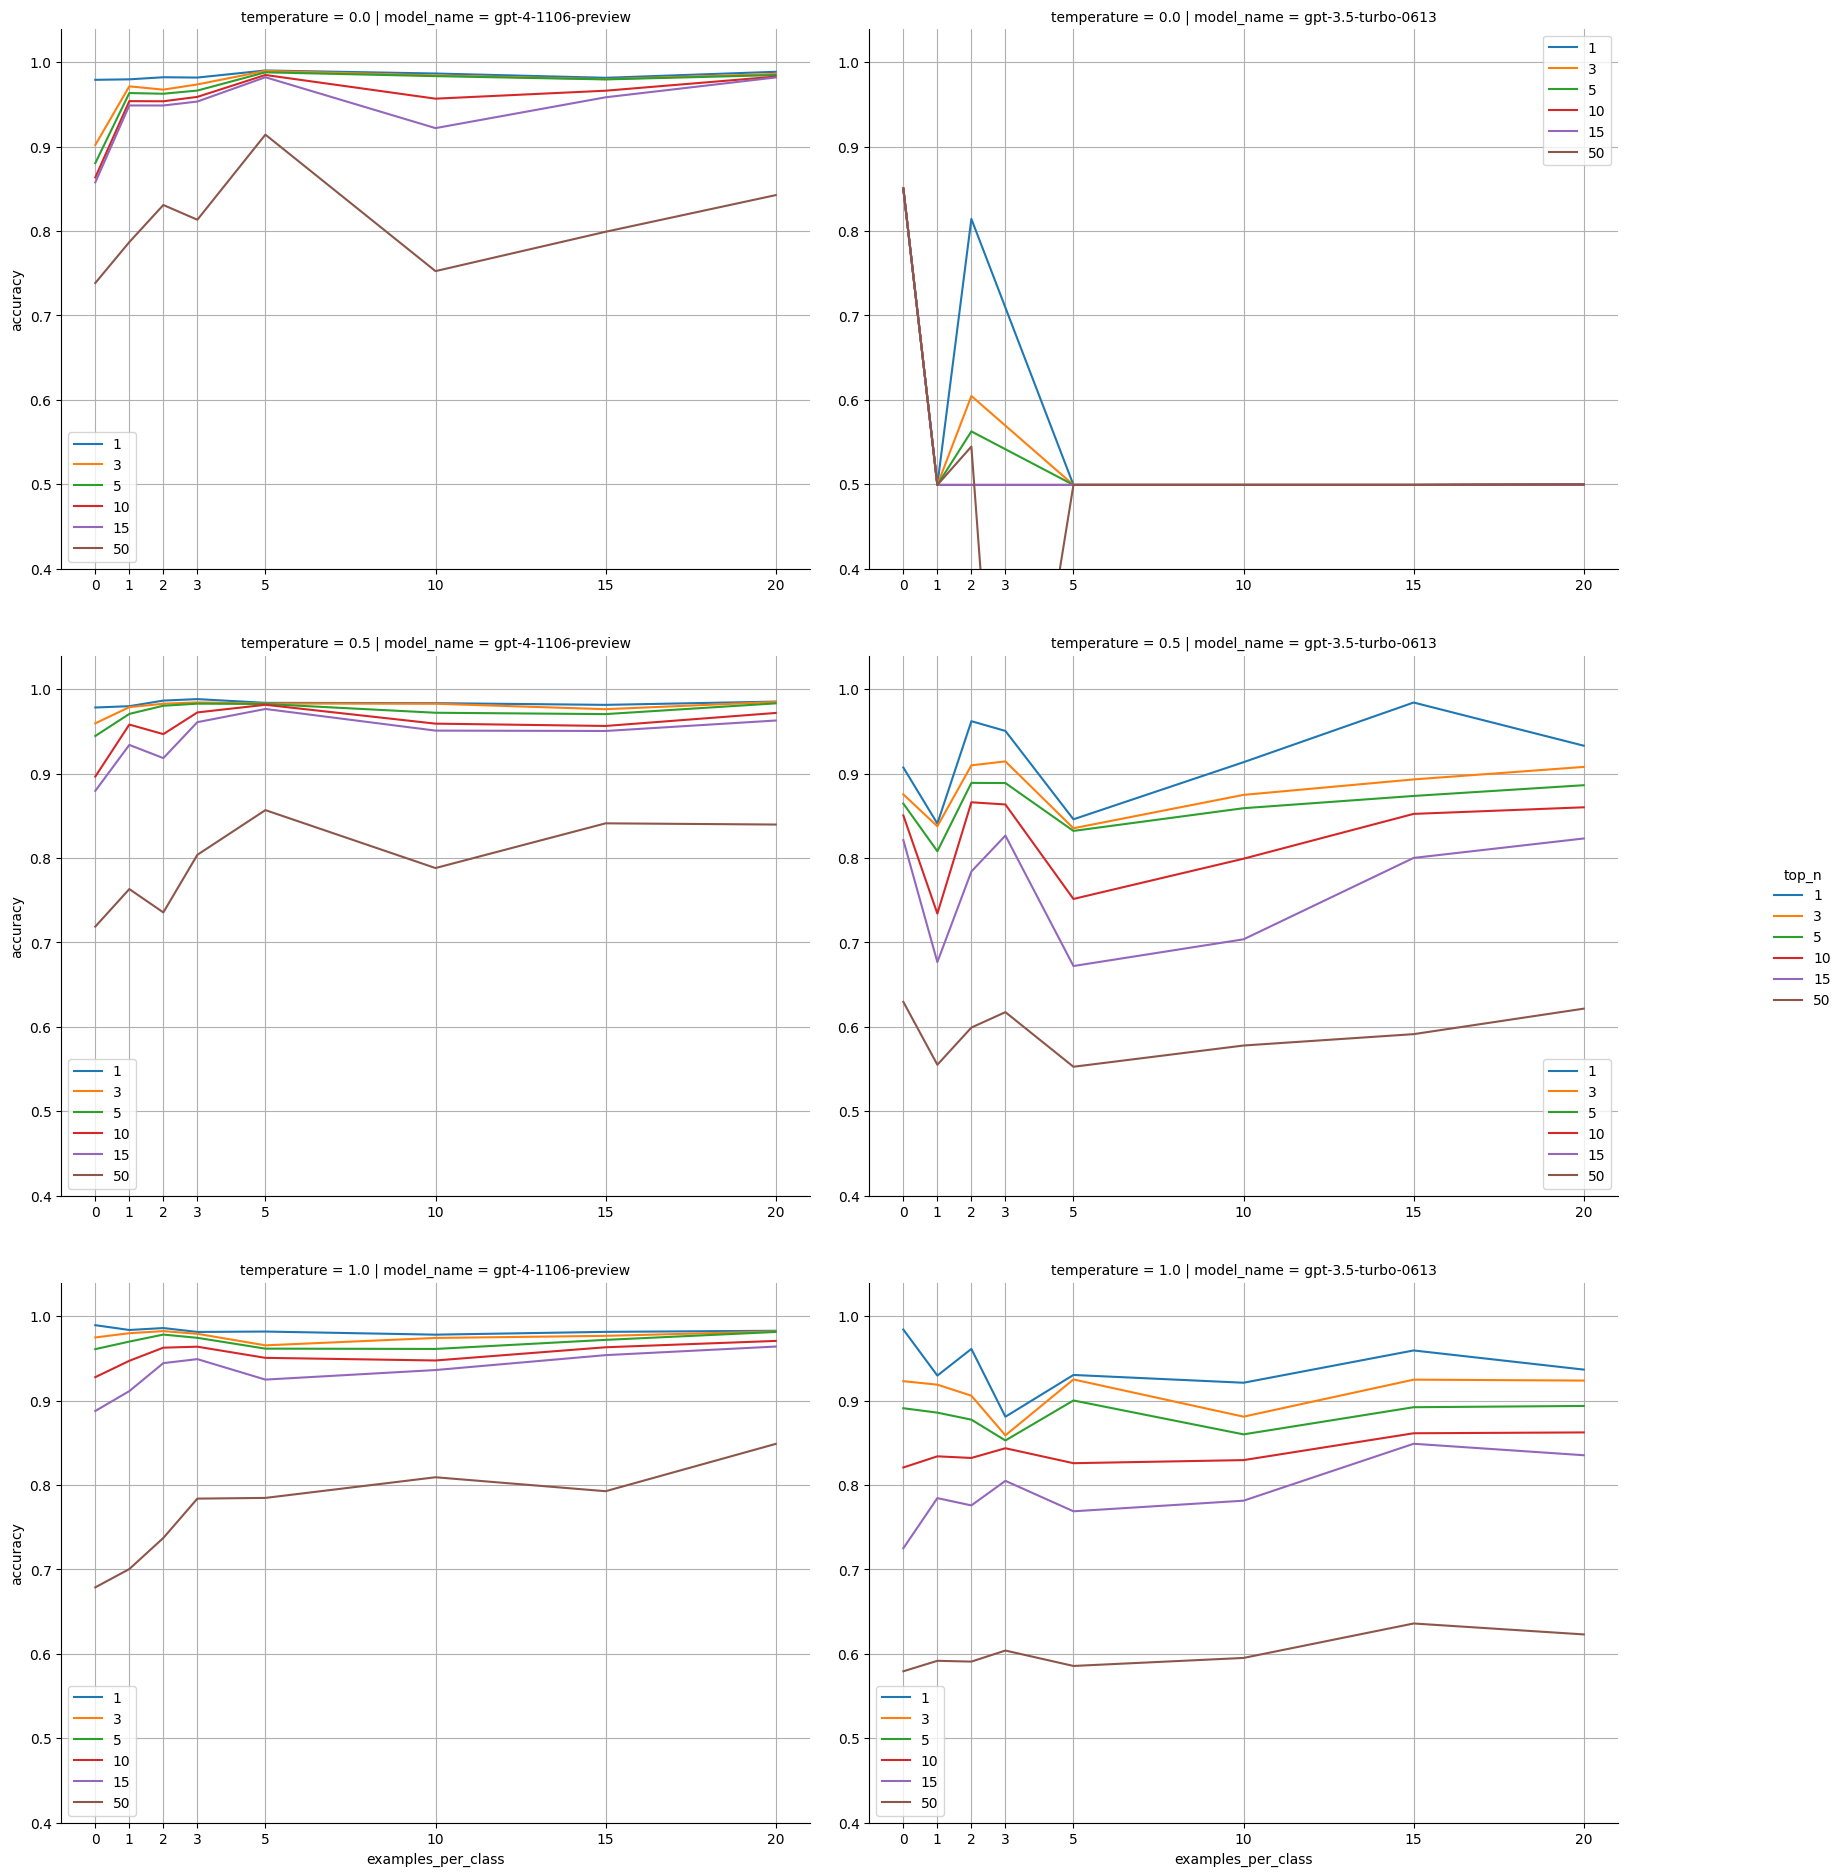

In [13]:
#create multiple lineplots in a grid
#every lineplot represent a model_name and temperatuer couple, on the x there is the examples_per_class and on the y the accuracy, the hue is the top_k
g = sns.FacetGrid(df_basic, col="model_name", row="temperature", hue="top_k")
g.map(sns.lineplot, "examples_per_class",  "accuracy").add_legend()

#g.add_legend()
#show x and y label in every grid
#g.set_axis_labels("examples_per_class", "accuracy")

#show the grid in larger figure
g.fig.set_figwidth(20)
g.fig.set_figheight(20)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft = True)
    ax.set_xlabel("examples_per_class")
    ax.set_ylabel("accuracy")
    ax.legend()
    ax.grid(visible=True)
    plt.xticks(list(df_basic.examples_per_class.unique()))

    #ax.set_axis_labels("examples_per_class", "accuracy")
    #ax.add_legend()
    ax.set_ylim(bottom=0.4)



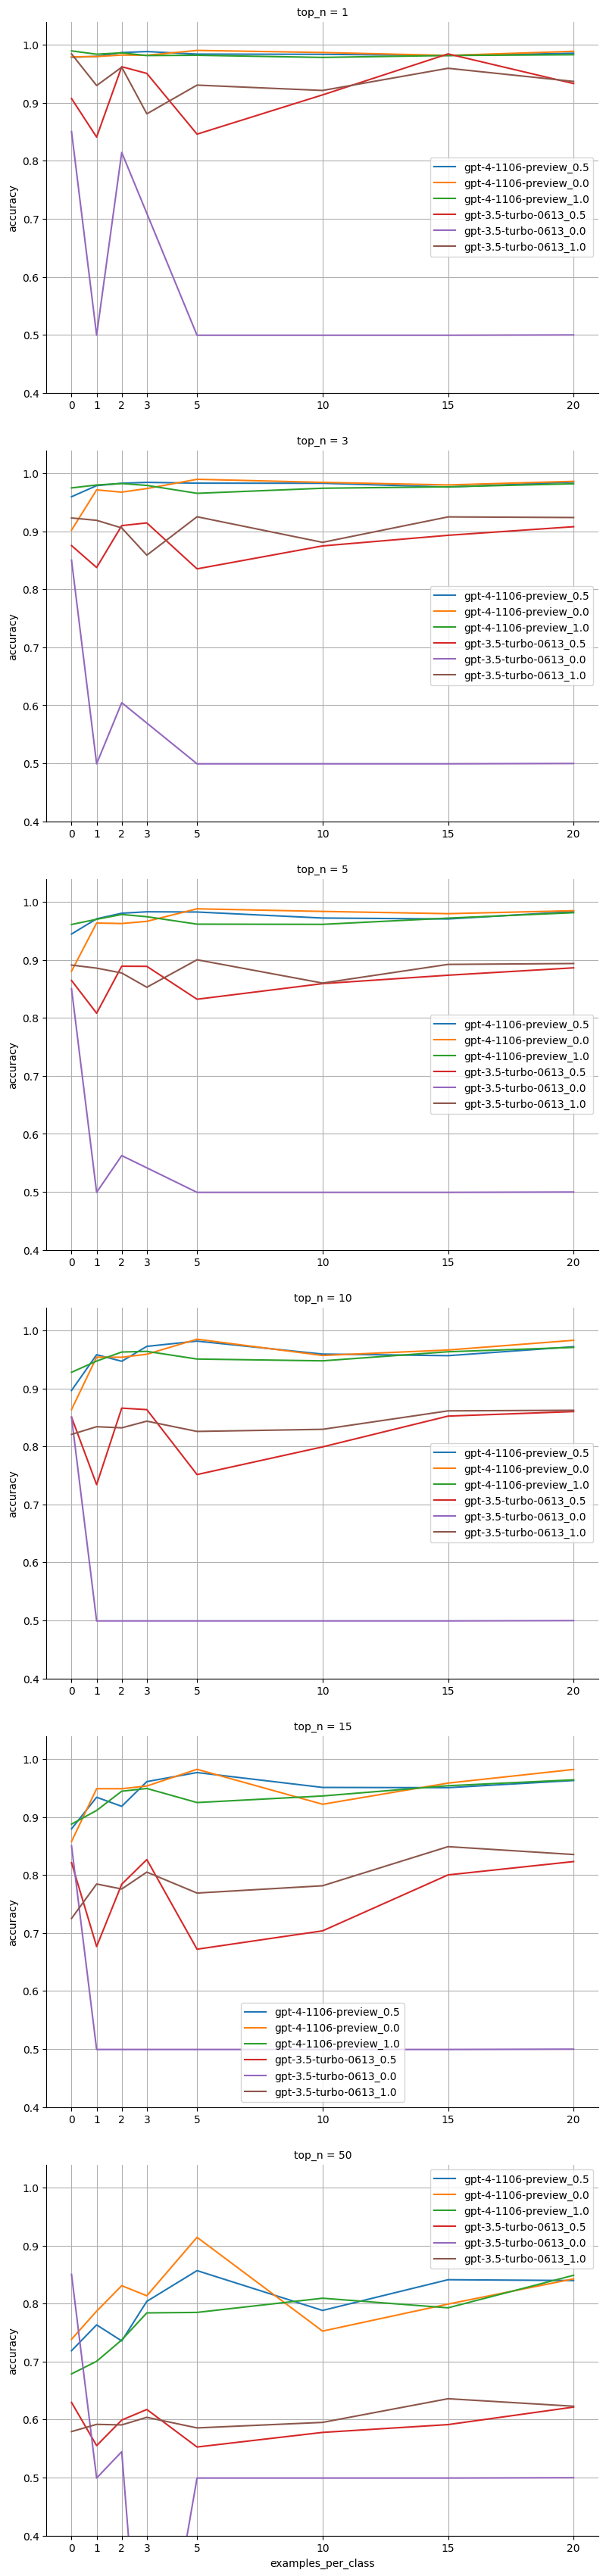

In [17]:
#create multiple lineplots in a grid
#every lineplot represent a model_name and temperatuer couple, on the x there is the examples_per_class and on the y the accuracy, the hue is the top_k
df_basic["model_temperature"] = df_basic["model_name"] + "_" + df_basic["temperature"].astype(str)
g = sns.FacetGrid(df_basic, row="top_k", hue="model_temperature")
g.map(sns.lineplot, "examples_per_class",  "accuracy")

#g.add_legend()
#show x and y label in every grid
#g.set_axis_labels("examples_per_class", "accuracy")

#show the grid in larger figure
g.fig.set_figwidth(10)
g.fig.set_figheight(35)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft = True)
    ax.set_xlabel("examples_per_class")
    ax.set_ylabel("accuracy")
    ax.legend()
    ax.grid(visible=True)
    plt.xticks(list(df_basic.examples_per_class.unique()))

    #ax.set_axis_labels("examples_per_class", "accuracy")
    #ax.add_legend()
    ax.set_ylim(bottom=0.4)
